In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\manhi\Documents\PPR_Senegal\python_scripts\segmented_distance_models\input_data_seg\cumulative_data.xlsx")
df.head()

,experiment,duration,Cap1,Cap2,time,infected,distance
0,1,1,436,100,13.38,0,1.0
1,1,1,436,116,25.48,0,1.0
2,1,1,436,255,27.10,0,1.0
3,1,1,436,449,37.75,0,1.0
4,1,1,436,3008,1.22,0,1.0


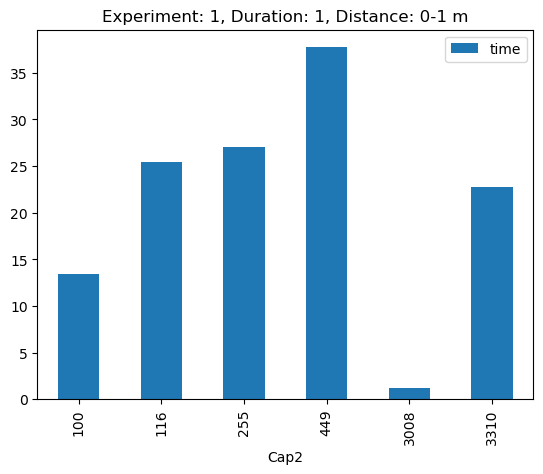

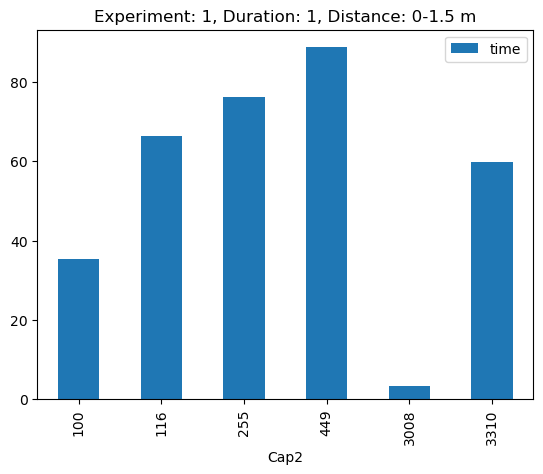

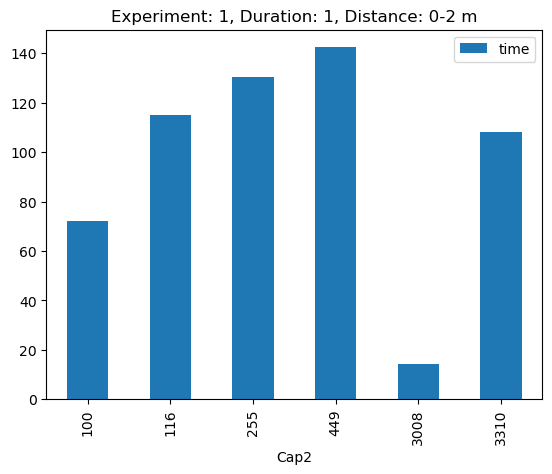

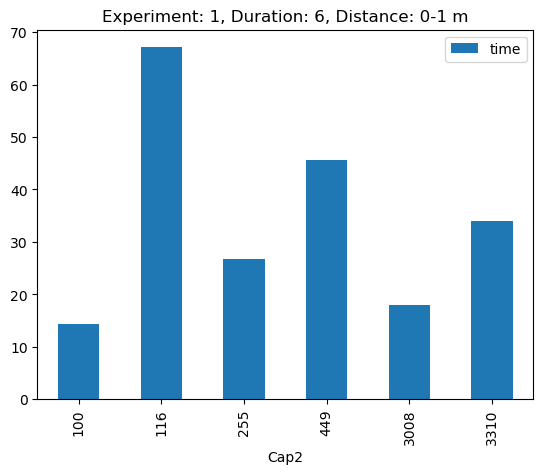

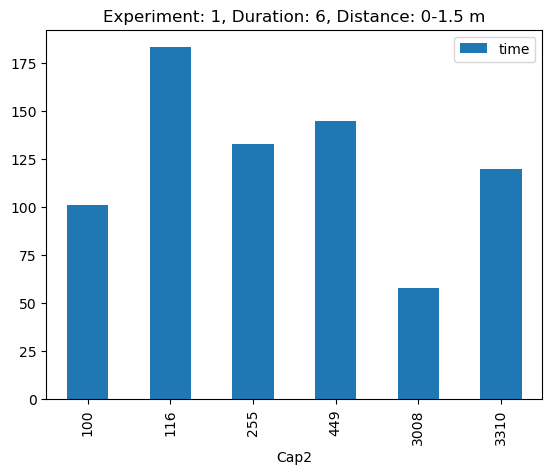

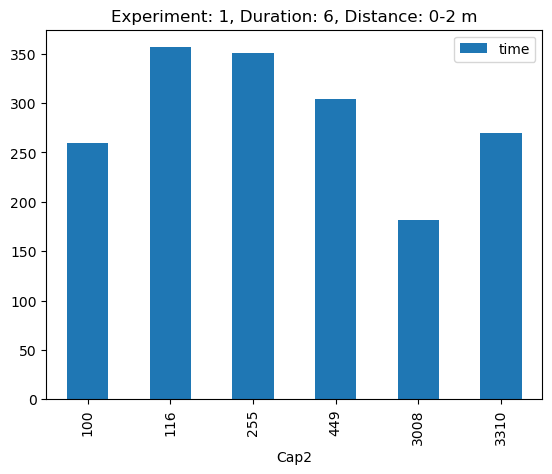

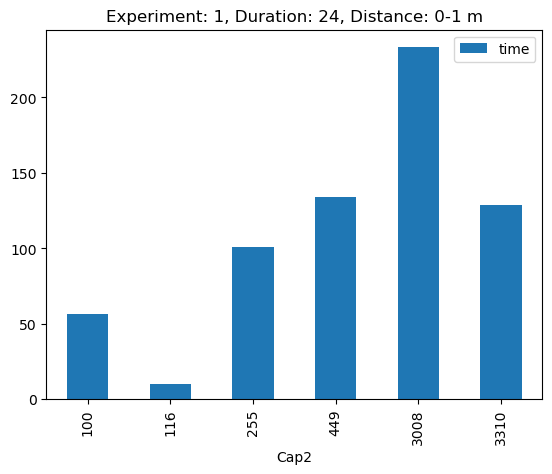

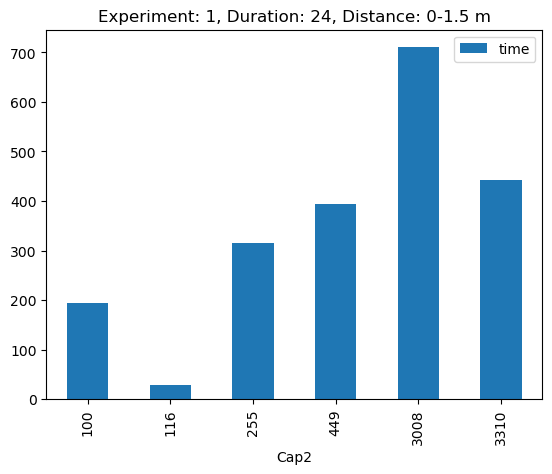

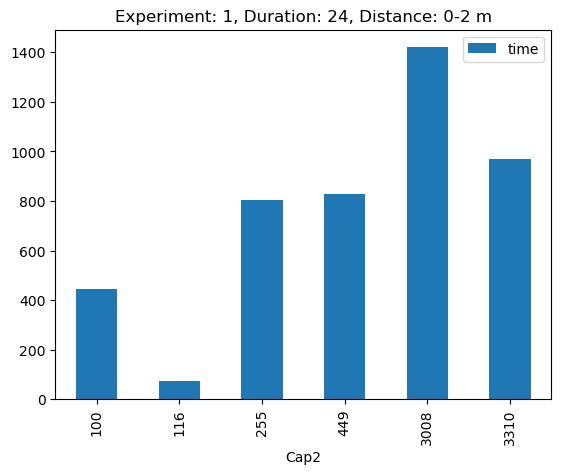

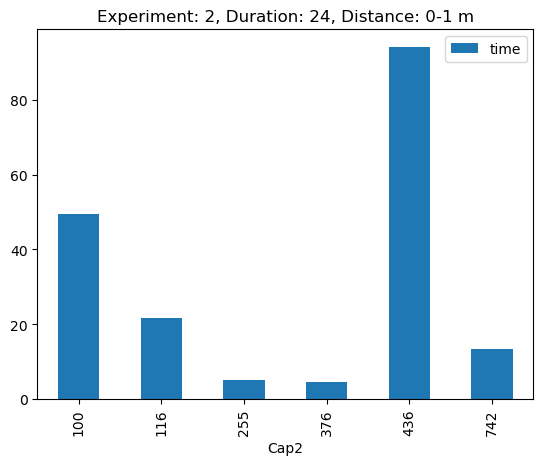

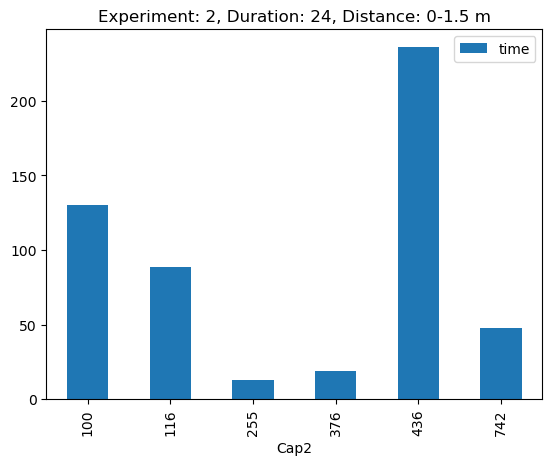

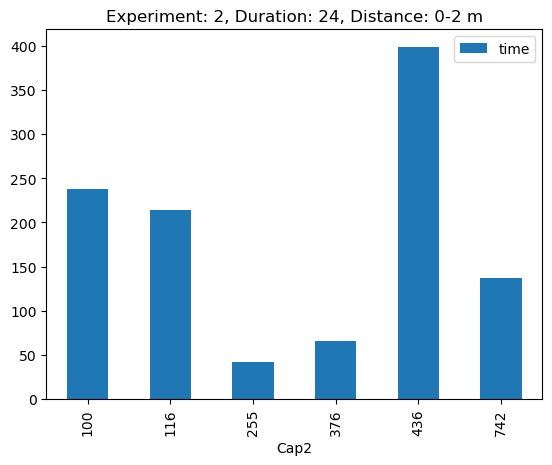

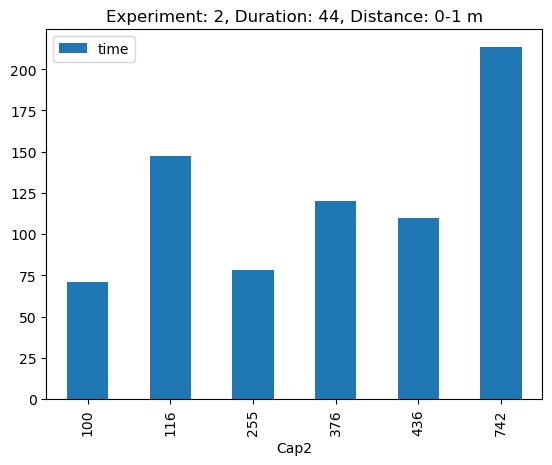

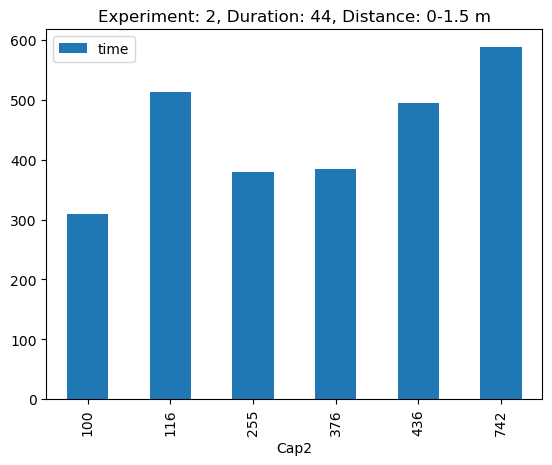

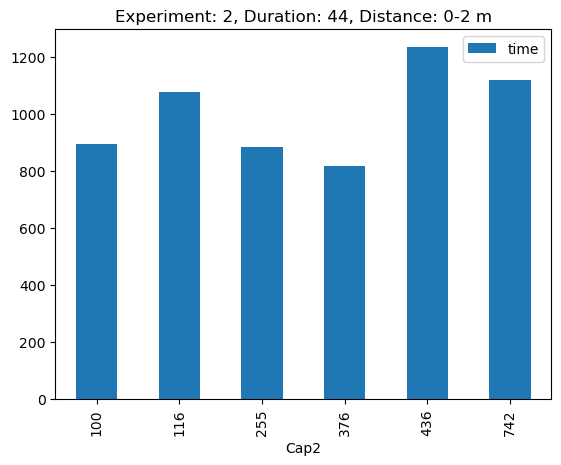

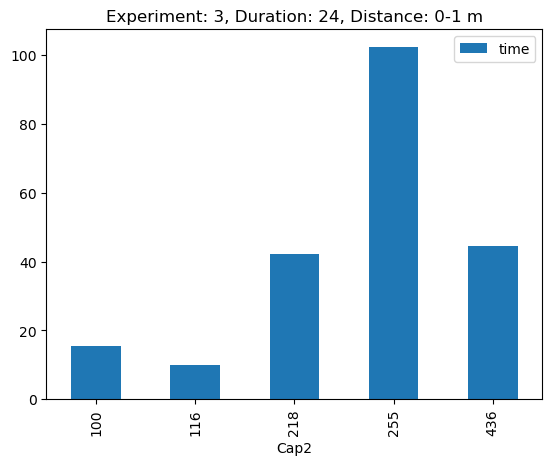

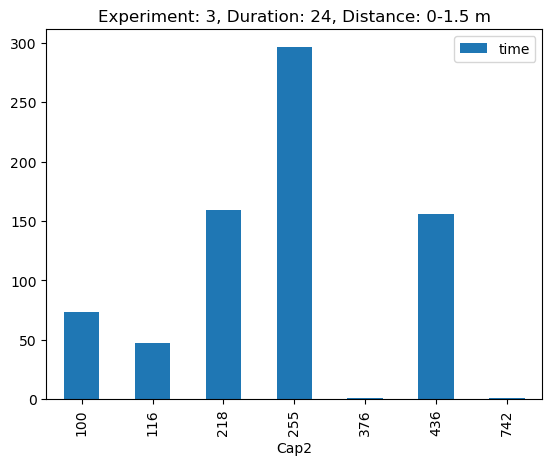

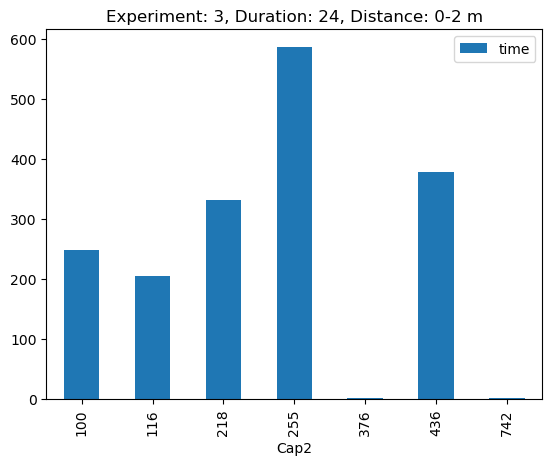

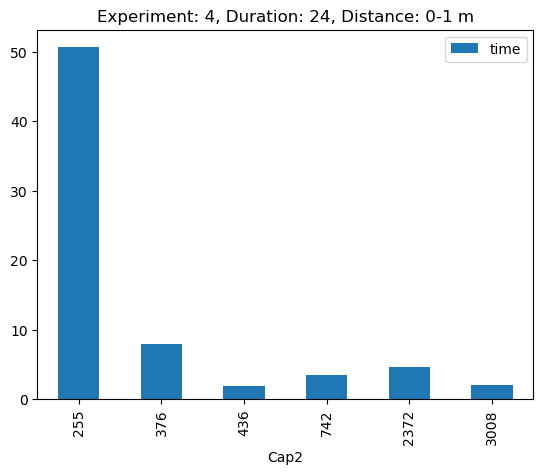

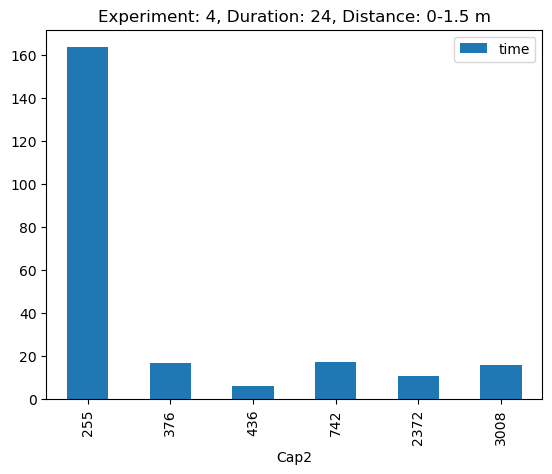

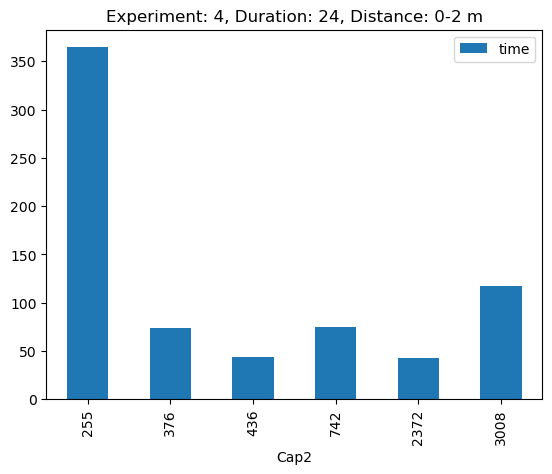

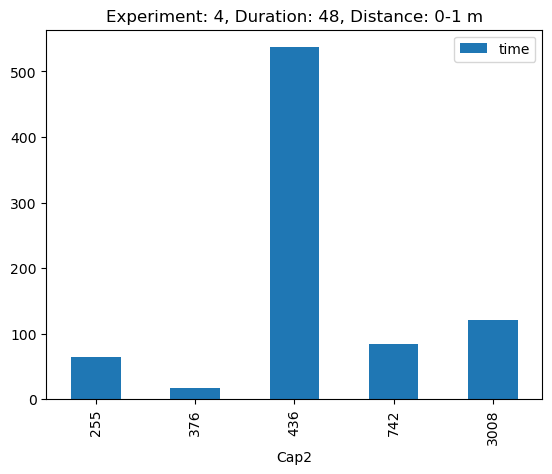

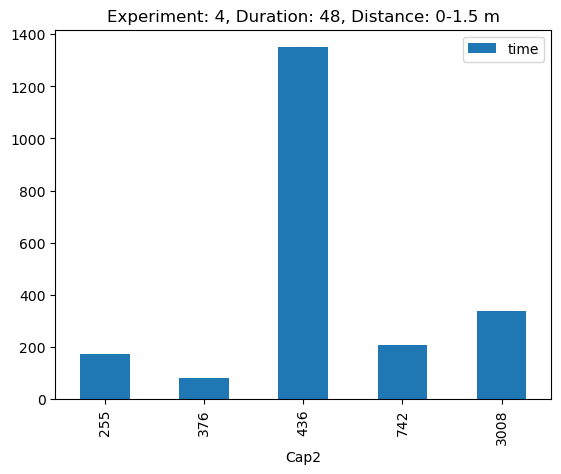

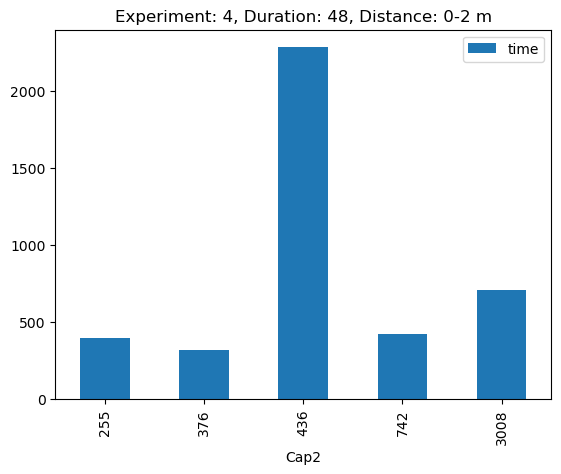

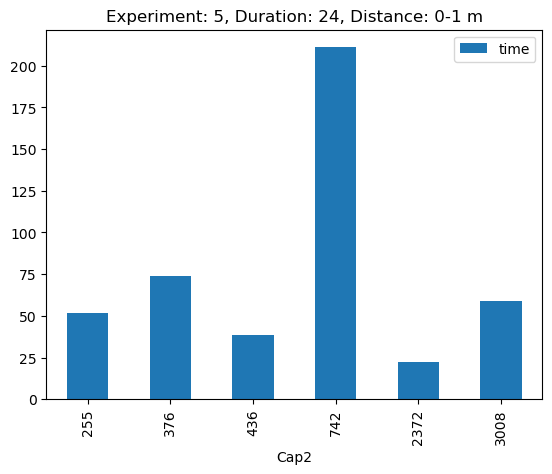

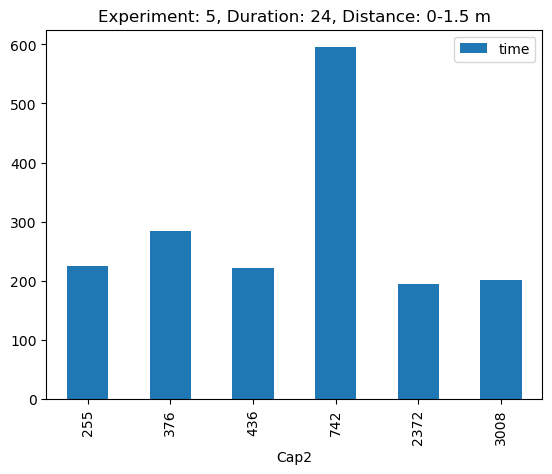

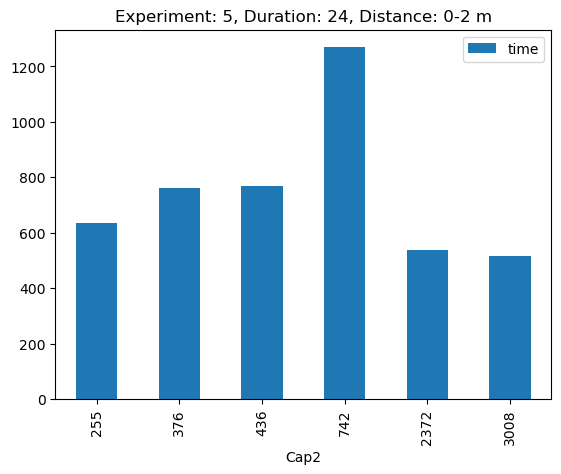

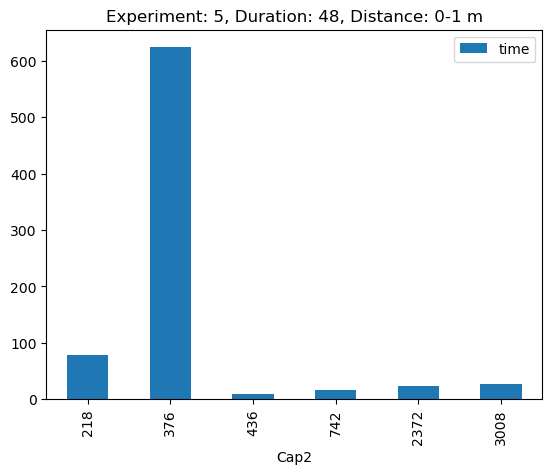

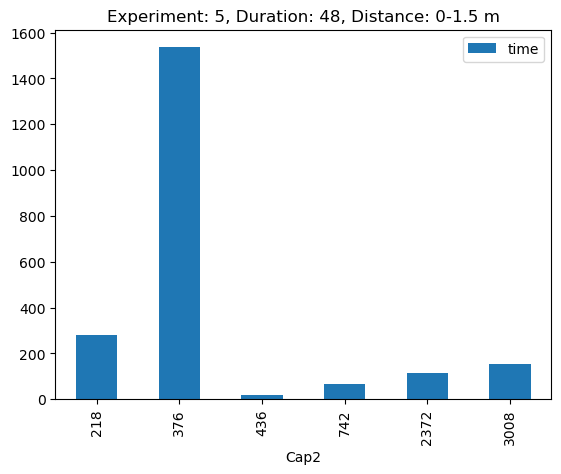

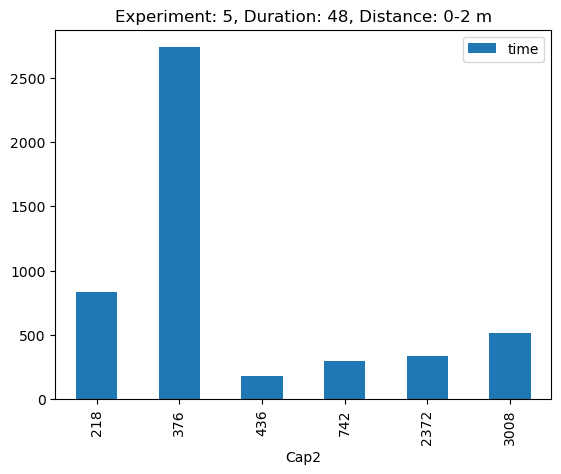

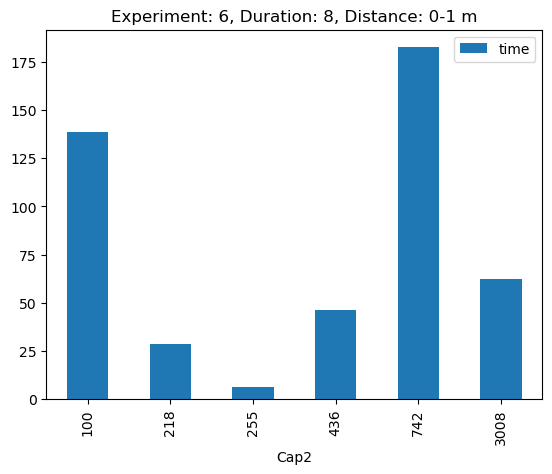

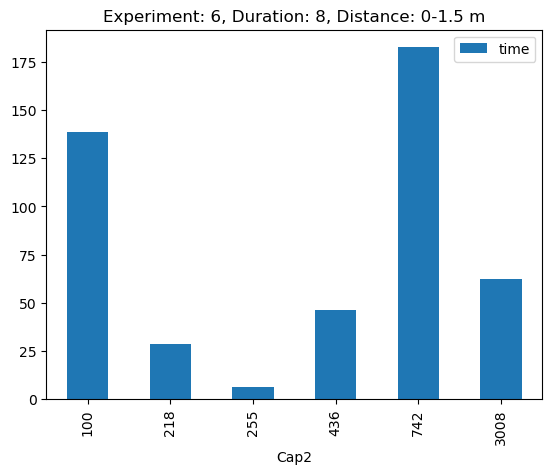

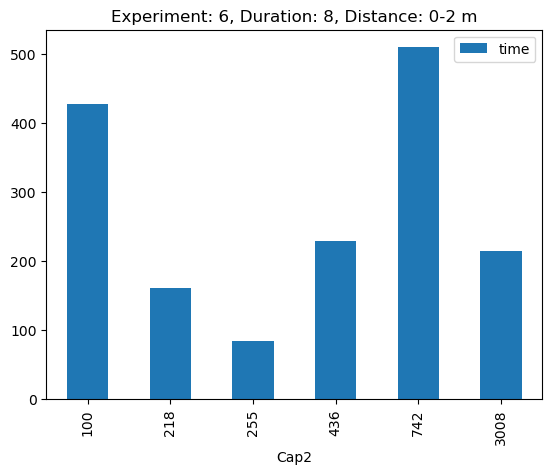

In [7]:
distances = [(0, 1), (0, 1.5), (0, 2)]
events = df['experiment'].unique() 


for event in events:
    df_event = df[(df['experiment'] == event)]
    durations = df_event['duration'].unique()
    
    for duration in durations:

        df_duration = df_event[(df_event['duration'] == duration)]

        for start, end in distances:

            # Filtrer  
            df_interval = df_duration[(df_duration['distance'] >= start) & (df_duration['distance'] <= end)]

            # Calcul temps cumulatif
            df_interval = df_interval.groupby('Cap2')['time'].sum().reset_index()
        
            # Graphique
            ax = df_interval.plot(kind='bar', x='Cap2', y='time')
            ax.set_title(f'Experiment: {event}, Duration: {duration}, Distance: {start}-{end} m')  


            #ax = sns.boxplot(x="Cap2", y="time", data=df_interval)


            plt.show()

In [ ]:
distances = [(0, 1), (1, 2), (2, 3)]  
events = df['event'].unique()
durations = df['duration'].unique()

for event in events:

    for duration in durations:

        df_sub = df[(df['event'] == event) & (df['duration'] == duration)]

        for start, end in distances:

            df_interval = df_sub[(df_sub['Distance'] >= start) & (df_sub['Distance'] <= end)]
            
            df_interval = df_interval.groupby('ID')['Cumulative time'].sum().reset_index()

            ax = sns.boxplot(x="ID", y="Cumulative time", data=df_interval)
            ax.set_title(f'Event: {event}, Duration: {duration}, Distance: {start}-{end} m')

            plt.show()

Les changements:

    J'utilise seaborn pour créer le boxplot
    Je plot sur x='ID' et y='Cumulative time'
    J'ajuste les labels

Tout le reste de la logique de filtrage et de bouclage reste identique.

N'hésitez pas si vous avez d'autres questions!
